# Parse mutation data for time series, frequency plots.

## Problems & Solutions
### 1. Inconsistent number of columns in gdiff output files raises error with pandas read_table() function.
Solution 1: Table headers need to be specified with read_table(names=[]) to assign NaN to "missing" column values.

In [258]:
import numpy as np
import pandas as pd
import re
gdiff_df = pd.read_table('/Users/ymseah/Documents/sic_UA3_S2_L001_breseq/output/evidence/annotated.gd', comment='#', names=range(25))
gdiff_df.insert(0, 'frequency', 0.0)

In [259]:
for row in gdiff_df.itertuples():
    #check each column for polymorphism frequencies
    i = 6
    while i < 25:
        if re.match('frequency=', str(gdiff_df.loc[row[0], i])):
            gdiff_df.loc[row[0], 'frequency'] = re.sub('frequency=', '', str(gdiff_df.loc[row[0], i]))
        i += 1
    if re.match('1|2|3|4|5|6|7|8|9', str(gdiff_df.loc[row[0], 'frequency'])):
        gdiff_df.loc[row[0], 'frequency'] = float(gdiff_df.loc[row[0], 'frequency'])
    else:
        gdiff_df.loc[row[0], 'frequency'] = 0.0
    #change position (col4) type to int for plotting
    gdiff_df.loc[row[0], 4] = int(gdiff_df.loc[row[0], 4])
gdiff_df.rename(columns = {4:'position'}, inplace=True)

In [260]:
DvH_df = gdiff_df[gdiff_df[3] == 'NC_002937']
#DvHplasmid_df = df.loc[df['genome'] == 'NC_005863']
MmS2_df = gdiff_df[gdiff_df[3] == 'NC_005791']

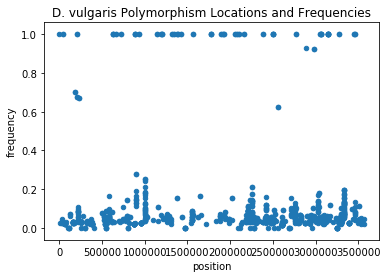

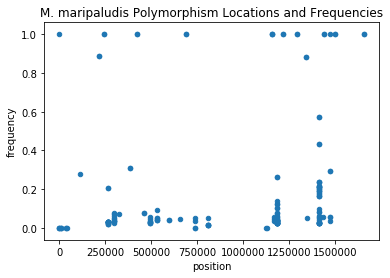

In [261]:
import matplotlib.pyplot as plt
DvH_df.plot.scatter(x = 'position', y = 'frequency')
plt.title('D. vulgaris Polymorphism Locations and Frequencies')
plt.show()
MmS2_df.plot.scatter(x = 'position', y = 'frequency')
plt.title('M. maripaludis Polymorphism Locations and Frequencies')
plt.show()

Solution 2: Use index.html output instead, parse into data structure acceptable by pandas.

In [2]:
import re
from bs4 import BeautifulSoup
soup = BeautifulSoup(open('/Users/ymseah/Documents/sic_UA3_S2_L001_breseq/output/index.html'), 'html5lib')

#EXAMPLE ROW
#<tr class="normal_table_row">
#<td align="center"><a href="evidence/INS_1.html">RA</a></td><!-- Evidence -->
#<td align="center">NC_002937</td><!-- Seq_Id -->
#<td align="right">42,867</td><!-- Position -->
#<td align="center">+G</td><!-- Cell Mutation -->
#<td align="right">100%</td>
#<td align="center">intergenic (‑125/+57)</td>
#<td align="center"><i>DVU0036</i> ← / ← <i>DVU0037</i></td>
#<td align="left">hypothetical protein/hypothetical protein</td>
#</tr>

#get each consensus mode row 
tr_consensus = soup('tr', 'normal_table_row')
cons_ref_genome = [tr.find_all_next('td')[1].text for tr in tr_consensus]
cons_mutation_pos = [tr.find_all_next('td')[2].text for tr in tr_consensus]
cons_mutation = [tr.find_all_next('td')[3].text for tr in tr_consensus]
cons_freq = [tr.find_all_next('td')[4].text for tr in tr_consensus]

#get each polymorphism mode row
tr_polymorphism = soup('tr', 'polymorphism_table_row')
polym_ref_genome = [tr.find_all_next('td')[1].text for tr in tr_polymorphism]
polym_mutation_pos = [tr.find_all_next('td')[2].text for tr in tr_polymorphism]
polym_mutation = [tr.find_all_next('td')[3].text for tr in tr_polymorphism]
polym_freq = [tr.find_all_next('td')[4].text for tr in tr_polymorphism]

ref_genome = cons_ref_genome + polym_ref_genome

mutation_pos = cons_mutation_pos + polym_mutation_pos
clean_mutation_pos = []
i = 0
while i < len(mutation_pos):
    clean_position = re.sub(',', '', mutation_pos[i])
    clean_mutation_pos.append(int(clean_position))
    i += 1

freq = cons_freq + polym_freq
clean_freqs = []
i = 0
while i < len(freq):
    clean_freq = re.sub('%', '', freq[i])
    clean_freqs.append(float(clean_freq))
    i += 1

mutation_freq_dict = {'genome': ref_genome, 'position': clean_mutation_pos, 'frequency': clean_freqs}

In [3]:
import numpy as np
import pandas as pd
df = pd.DataFrame(mutation_freq_dict)
DvH = df.loc[df['genome'] == 'NC_002937']
#DvHplasmid = df.loc[df['genome'] == 'NC_005863']
MmS2 = df.loc[df['genome'] == 'NC_005791']

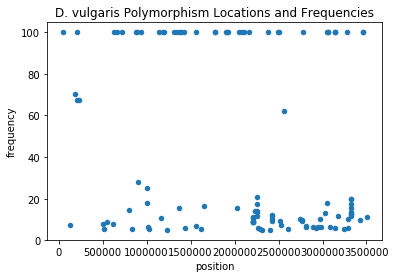

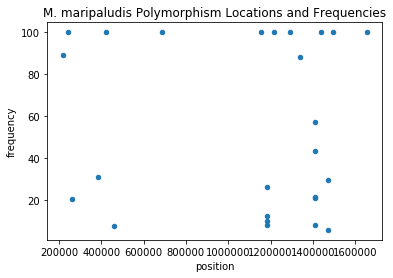

In [4]:
import matplotlib.pyplot as plt
DvH.plot.scatter(x = 'position', y = 'frequency')
plt.title('D. vulgaris Polymorphism Locations and Frequencies')
plt.show()
MmS2.plot.scatter(x = 'position', y = 'frequency')
plt.title('M. maripaludis Polymorphism Locations and Frequencies')
plt.show()